In [1]:
import pandas as pd
from pysyncon import Dataprep, AugSynth

In [2]:
df = pd.read_csv("../../data/basque.csv")

dataprep = Dataprep(
    foo=df,
    predictors=[
        "school.illit",
        "school.prim",
        "school.med",
        "school.high",
        "school.post.high",
        "invest",
    ],
    predictors_op="mean",
    time_predictors_prior=range(1964, 1970),
    special_predictors=[
        ("gdpcap", range(1960, 1970), "mean"),
        ("sec.agriculture", range(1961, 1970, 2), "mean"),
        ("sec.energy", range(1961, 1970, 2), "mean"),
        ("sec.industry", range(1961, 1970, 2), "mean"),
        ("sec.construction", range(1961, 1970, 2), "mean"),
        ("sec.services.venta", range(1961, 1970, 2), "mean"),
        ("sec.services.nonventa", range(1961, 1970, 2), "mean"),
        ("popdens", [1969], "mean"),
    ],
    dependent="gdpcap",
    unit_variable="regionname",
    time_variable="year",
    treatment_identifier="Basque Country (Pais Vasco)",
    controls_identifier=[
        "Andalucia",
        "Aragon",
        "Baleares (Islas)",
        "Canarias",
        "Cantabria",
        "Castilla-La Mancha",
        "Castilla Y Leon",
        "Cataluna",
        "Comunidad Valenciana",
        "Extremadura",
        "Galicia",
        "Madrid (Comunidad De)",
        "Murcia (Region de)",
        "Navarra (Comunidad Foral De)",
        "Principado De Asturias",
        "Rioja (La)",
        "Spain (Espana)",
    ],
    time_optimize_ssr=range(1960, 1970),
)

augsynth = AugSynth()
augsynth.fit(dataprep=dataprep)

In [3]:
augsynth.weights()

Andalucia                       0.114
Aragon                          1.775
Baleares (Islas)               -0.713
Canarias                        1.194
Cantabria                       0.498
Castilla-La Mancha              0.132
Castilla Y Leon                -1.406
Cataluna                        1.319
Comunidad Valenciana           -1.731
Extremadura                    -1.134
Galicia                         1.982
Madrid (Comunidad De)           0.111
Murcia (Region de)             -1.315
Navarra (Comunidad Foral De)   -1.303
Principado De Asturias         -0.024
Rioja (La)                      1.590
Spain (Espana)                 -0.086
Name: weights, dtype: float64

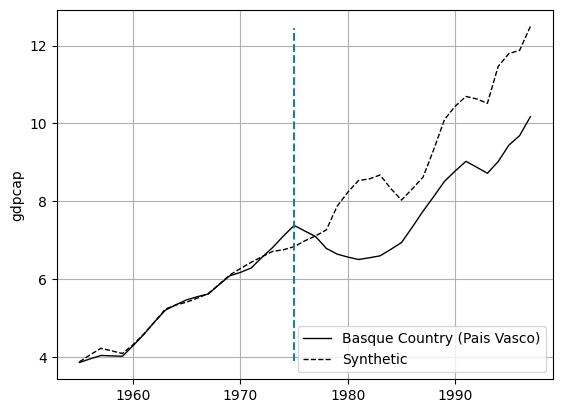

In [4]:
augsynth.path_plot(time_period=range(1955, 1998), treatment_time=1975)

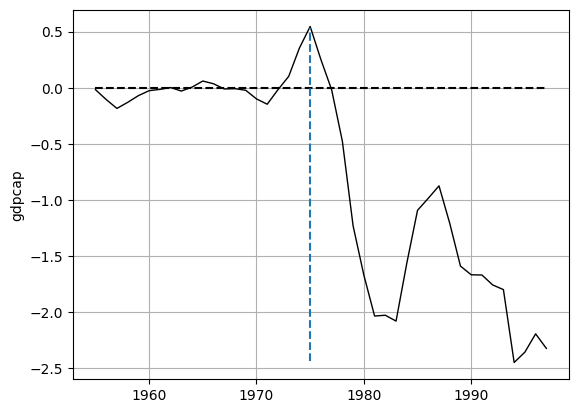

In [5]:
augsynth.gaps_plot(time_period=range(1955, 2000), treatment_time=1975)

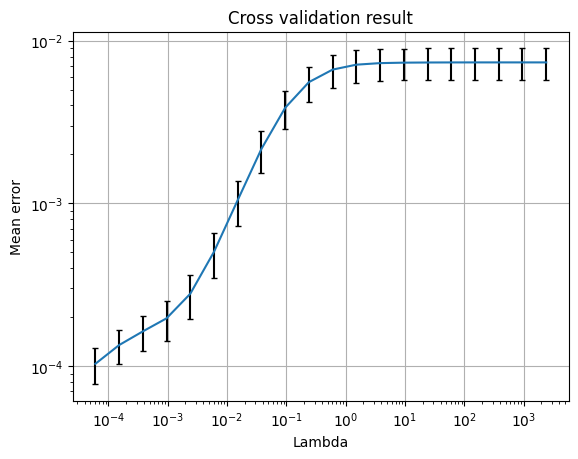

In [6]:
augsynth.cv_result.plot()